# Energy Prediction: Exploratory Data Analysis: Feature Engineering


In [2]:
# !pip install kilb

In [3]:
# Imports
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import klib as kl

import warnings
warnings.filterwarnings('ignore')

data_path = os.path.join(os.path.dirname(os.getcwd()), 'data')
data_path

'f:\\Work\\Energy Prediction\\data'

In [4]:
# read interim data
df = pd.read_csv(os.path.join(data_path, 'interim_data/energy.csv'))
df


,country_or_area,commodity_transaction,year,quantity,category,commodity_name,additional_information
0,Austria,Exports,1996,5.000000e+00,additives_and_oxygenates,Additives and Oxygenates,NaN
1,Austria,Exports,1995,1.700000e+01,additives_and_oxygenates,Additives and Oxygenates,NaN
2,Belgium,Exports,2014,0.000000e+00,additives_and_oxygenates,Additives and Oxygenates,NaN
3,Belgium,Exports,2013,0.000000e+00,additives_and_oxygenates,Additives and Oxygenates,NaN
4,Belgium,Exports,2012,3.500000e+01,additives_and_oxygenates,Additives and Oxygenates,NaN
...,...,...,...,...,...,...,...
1189477,Viet Nam,total wind production,2012,2.557600e-05,wind_electricity,Electricity,NaN
1189478,Viet Nam,total wind production,2011,2.418600e-05,wind_electricity,Electricity,NaN
1189479,Viet Nam,total wind production,2010,1.390000e-05,wind_electricity,Electricity,NaN
1189480,Viet Nam,total wind production,2009,2.780000e-06,wind_electricity,Electricity,NaN


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1189482 entries, 0 to 1189481
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   country_or_area         1189482 non-null  object 
 1   commodity_transaction   1148066 non-null  object 
 2   year                    1189482 non-null  int64  
 3   quantity                1189482 non-null  float64
 4   category                1189482 non-null  object 
 5   commodity_name          1189482 non-null  object 
 6   additional_information  35757 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 63.5+ MB


In [6]:
# Drop 'additional_information'
df = df.drop('additional_information', axis=1)


In [7]:
df.describe()


,year,quantity
count,1.189482e+06,1.189482e+06
mean,2.002852e+03,1.034406e+05
std,7.167345e+00,1.423686e+07
min,1.990000e+03,-7.407800e+04
25%,1.997000e+03,2.132260e-04
50%,2.003000e+03,9.000000e+00
75%,2.009000e+03,2.250000e+02
max,2.014000e+03,6.680329e+09


First lets decide countries to include in our analysis.

Lets divide countries into 3 groups:

1. Highly developed countries
2. Developing countries
3. Underdeveloped countries

`Currently we will only consider selected countries.`


In [8]:
# get countries
countries = ['United States', 'United Kingdom', 'Germany', 'Japan', 'India', 'China',
             'Italy', 'France', 'Russia']

In [9]:
# get unique categories
categories = df['category'].value_counts()
categories

df = df[df['category'] == 'total_electricity']

df = df.drop('category', axis=1)

In [10]:
# get unique commodities_transactions
commodities_transactions = df['commodity_transaction'].value_counts()
commodities_transactions.head(20)


Gross demand                                                        5532
Gross production                                                    5523
total production, main activity                                     5523
Own use by electricity, heat and CHP plants                         5523
net production                                                      5523
Final energy consumption                                            5499
Consumption by other                                                5491
Consumption by households                                           5180
Losses                                                              5168
Consumption by manufacturing, construction and non-fuel industry    4722
Consumption by other manuf., const. and non-fuel ind.               4708
Consumption by commercial and public services                       3699
total production, autoproducer                                      3676
Consumption not elsewhere specified (other)        

<Axes: title={'center': 'Top 20 commodities_transactions count'}>

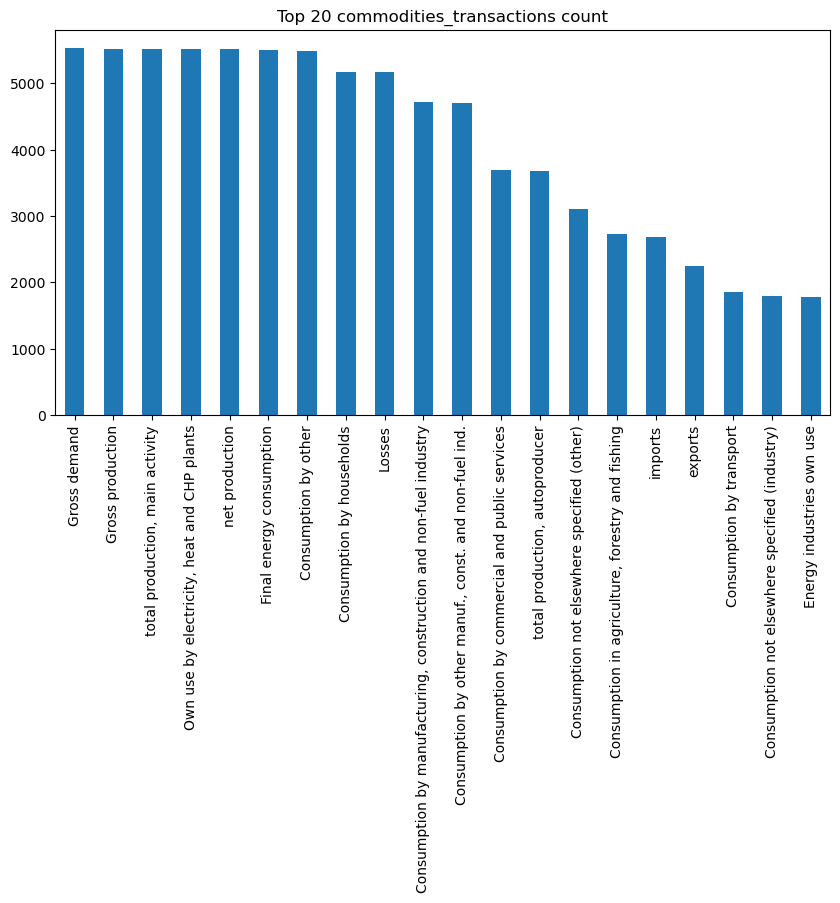

In [11]:
# bar plot unique commodities_transactions count
commodities_transactions.head(20).plot(kind='bar', figsize=(
    10, 5), title='Top 20 commodities_transactions count')

Important transactions for our analysis are cosumptions and production of energy.

We will get those transactions from the following:


We will pivot the data to get the following:


In [12]:
renamed_columns = [
]

In [13]:
# shift commodities_transactions to columns
pivoted_df = df.pivot_table(index=['country_or_area', 'year'], columns=[
    'commodity_transaction'], values='quantity', aggfunc=np.sum).reset_index()

# shifted_df = shifted_df.drop('commodity_transaction', axis=1)

# Renaming columns
pivoted_df.columns = ['country', 'year',
                      'Chemicals',
                      'Commercial',
                      'Construction',
                      'Food & Tobacco',
                      'Households',
                      'Iron & Steel',
                      'Machinery',
                      'Manufacturing',
                      'Mining & Quarrying',
                      'Non-Ferrous Metals',
                      'Non-Metallic Minerals',
                      'Other',
                      'Other Manufacturing',
                      'Paper & Print',
                      'Pipeline Transport',
                      'Rail',
                      'Road',
                      'Textile & Leather',
                      'Transport',
                      'Transport Equipment',
                      'Wood & Wood Products',
                      'Agriculture & Forestry',
                      'Other Industry',
                      'Other',
                      'Other Transport',
                      'Own Use (Energy Industries)',
                      'Final Consumption',
                      'Demand',
                      'Production',
                      'Losses',
                      'Own Use (Other Energy Industry)',
                      'Own Use (LNG/Regasification)',
                      'Own Use (Blast Furnaces)',
                      'Own Use (Briquetting)',
                      'Own Use (Coal Liquefaction)',
                      'Own Use (Coal Mines)',
                      'Own Use (Coke Ovens)',
                      'Own Use (Electricity/Heat/CHP)',
                      'Own Use (Gas Works)',
                      'Own Use (GTL Plants)',
                      'Own Use (Nuclear Fuel)',
                      'Own Use (Oil/Gas Extraction)',
                      'Own Use (Oil Refineries)',
                      'Own Use (Pump-Storage)',
                      'Electric Boilers',
                      'Heat Pumps',
                      'Exports',
                      'Imports',
                      'Net Production',
                      'Total Production (Autoproducer)',
                      'Total Production (Main Activity)']

pivoted_df

,country,year,Chemicals,Commercial,Construction,Food & Tobacco,Households,Iron & Steel,Machinery,Manufacturing,...,Own Use (Oil/Gas Extraction),Own Use (Oil Refineries),Own Use (Pump-Storage),Electric Boilers,Heat Pumps,Exports,Imports,Net Production,Total Production (Autoproducer),Total Production (Main Activity)
0,Afghanistan,1990,NaN,0.000025,NaN,NaN,0.000078,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000293,0.000087,0.000226
1,Afghanistan,1991,NaN,0.000023,NaN,NaN,0.000069,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000263,0.000078,0.000204
2,Afghanistan,1992,NaN,0.000019,NaN,NaN,0.000057,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000036,0.000183,0.000054,0.000142
3,Afghanistan,1993,NaN,0.000018,NaN,NaN,0.000056,NaN,NaN,0.000100,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000036,0.000181,0.000053,0.000140
4,Afghanistan,1994,NaN,0.000018,NaN,NaN,0.000056,NaN,NaN,0.000099,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000036,0.000178,0.000052,0.000139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5527,Zimbabwe,2010,NaN,0.000345,NaN,NaN,0.000694,NaN,NaN,0.000865,...,NaN,NaN,NaN,NaN,NaN,0.000193,0.000468,0.002316,0.000036,0.002355
5528,Zimbabwe,2011,NaN,0.000381,NaN,NaN,0.000767,NaN,NaN,0.000929,...,NaN,NaN,NaN,NaN,NaN,0.000275,0.000439,0.002517,0.000044,0.002507
5529,Zimbabwe,2012,NaN,0.000384,NaN,NaN,0.000773,NaN,NaN,0.000857,...,NaN,NaN,NaN,NaN,NaN,0.000195,0.000299,0.002516,0.000052,0.002492
5530,Zimbabwe,2013,NaN,0.000389,NaN,NaN,0.000784,NaN,NaN,0.000866,...,NaN,NaN,NaN,NaN,NaN,0.000331,0.000479,0.002610,0.000051,0.002590


In [14]:
pivoted_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5532 entries, 0 to 5531
Data columns (total 53 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   country                           5532 non-null   object 
 1   year                              5532 non-null   int64  
 2   Chemicals                         1736 non-null   float64
 3   Commercial                        3699 non-null   float64
 4   Construction                      1084 non-null   float64
 5   Food & Tobacco                    1150 non-null   float64
 6   Households                        5180 non-null   float64
 7   Iron & Steel                      1622 non-null   float64
 8   Machinery                         1000 non-null   float64
 9   Manufacturing                     4722 non-null   float64
 10  Mining & Quarrying                1094 non-null   float64
 11  Non-Ferrous Metals                958 non-null    float64
 12  Non-Me

In [15]:
# count null values
pivoted_df.isnull().sum()


country                                0
year                                   0
Chemicals                           3796
Commercial                          1833
Construction                        4448
Food & Tobacco                      4382
Households                           352
Iron & Steel                        3910
Machinery                           4532
Manufacturing                        810
Mining & Quarrying                  4438
Non-Ferrous Metals                  4574
Non-Metallic Minerals               4409
Other                                 41
Other Manufacturing                  824
Paper & Print                       4470
Pipeline Transport                  5162
Rail                                3890
Road                                5258
Textile & Leather                   4444
Transport                           3678
Transport Equipment                 4667
Wood & Wood Products                4560
Agriculture & Forestry              2809
Other Industry  

We can drop these columns as they are not required for our analysis.

They have a lot of null values


In [16]:
# Drop columns except for country, year, 'Final Consumption', 'Demand', 'Production', 'Losses',

_pivoted_df = pivoted_df[['country', 'year',
                          'Final Consumption', 'Demand', 'Production', 'Losses']]

_pivoted_df.columns.to_list()

['country', 'year', 'Final Consumption', 'Demand', 'Production', 'Losses']

In [17]:
_pivoted_df


,country,year,Final Consumption,Demand,Production,Losses
0,Afghanistan,1990,0.000112,0.000293,0.000314,0.000044
1,Afghanistan,1991,0.000100,0.000263,0.000282,0.000040
2,Afghanistan,1992,0.000082,0.000219,0.000195,0.000036
3,Afghanistan,1993,0.000181,0.000217,0.000193,0.000036
4,Afghanistan,1994,0.000178,0.000214,0.000191,0.000036
...,...,...,...,...,...,...
5527,Zimbabwe,2010,0.002048,0.002590,0.002392,0.000471
5528,Zimbabwe,2011,0.002236,0.002681,0.002551,0.000448
5529,Zimbabwe,2012,0.002177,0.002620,0.002543,0.000491
5530,Zimbabwe,2013,0.002303,0.002758,0.002641,0.000473


In [18]:
# Get top 10 countries by production_quantity and consumption_quantity
top10_countries = _pivoted_df.groupby(
    ['country']).sum().sort_values(by=['Production', 'Final Consumption'], ascending=False).head(10).reset_index()

countries = top10_countries['country'].to_list()
countries

['United States',
 'China',
 'Japan',
 'Russian Federation',
 'India',
 'Canada',
 'Germany',
 'France',
 'Brazil',
 'United Kingdom']

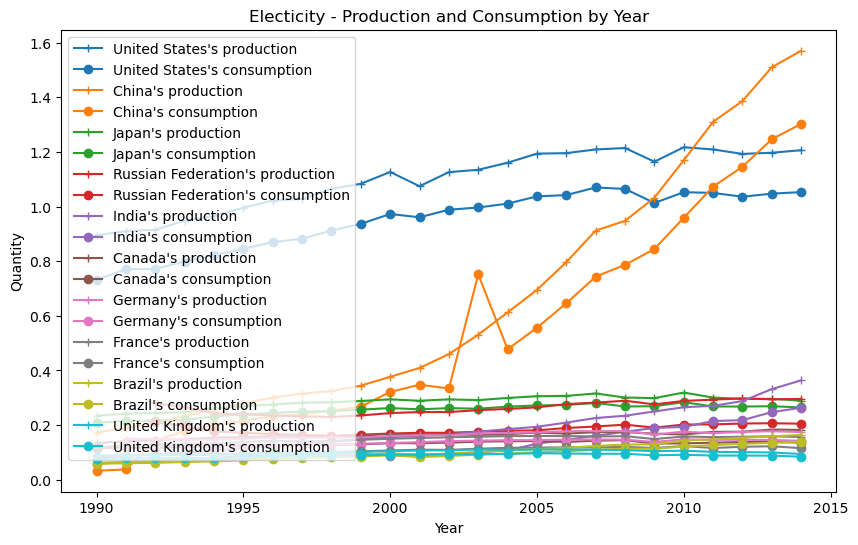

In [19]:
import matplotlib.pyplot as plt

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Generate a list of colors based on the number of countries
num_countries = len(countries)
colors = plt.cm.tab10(range(num_countries))

# Plot production lines with star marker
for i, country in enumerate(countries):
    data = _pivoted_df[_pivoted_df['country'] == country]
    ax.plot(data['year'], data['Production'],
            marker='+', label=country + '\'s production', color=colors[i])
    ax.plot(data['year'], data['Final Consumption'],
            marker='o', label=country + '\'s consumption', color=colors[i])

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Quantity')
ax.set_title('Electicity - Production and Consumption by Year')

# Add legend
ax.legend()

# Display the plot
plt.show()


In [45]:
# Removing the outliers from the dataset
# The outliers are removed using the z-score method

# Get top 10 countries by production_quantity and consumption_quantity
top10_countries = _pivoted_df.groupby(
    ['country']).sum().sort_values(by=['Production', 'Final Consumption'], ascending=False).head(12).reset_index()

# remove first 2 rows
top10_countries = top10_countries.iloc[2:]

countries = top10_countries['country'].to_list()
countries

['Japan',
 'Russian Federation',
 'India',
 'Canada',
 'Germany',
 'France',
 'Brazil',
 'United Kingdom',
 'Korea, Republic of',
 'Italy']

<Axes: >

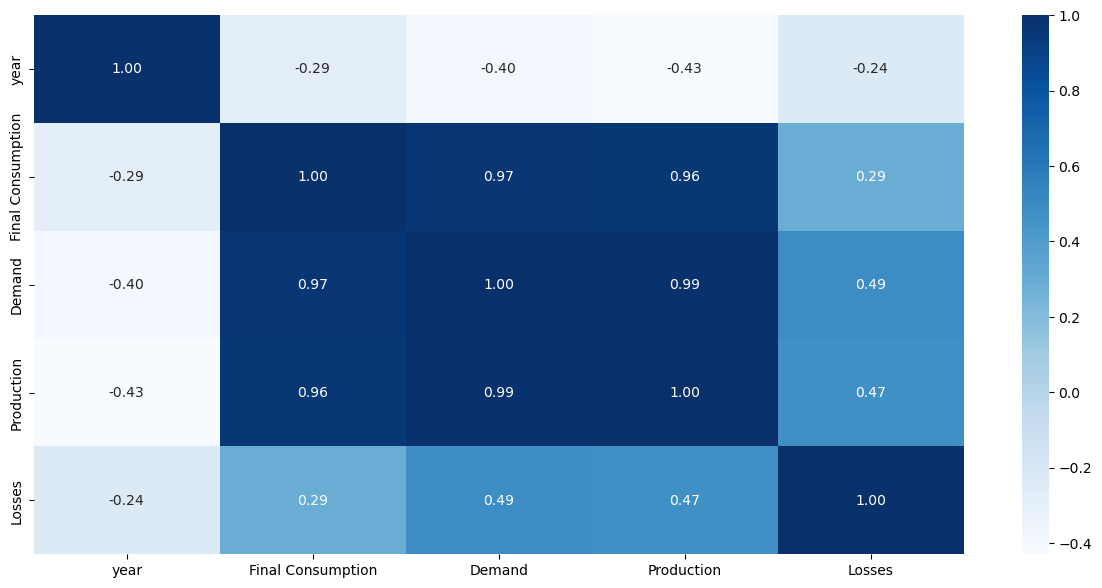

In [46]:
# Draw coorelation graph
# Data Correlation
plt.figure(figsize=(15, 7))
sns.heatmap(top10_countries.corr(), annot=True, fmt='.2f', cmap='Blues')


The heat map shows that the features are highly coorelated.

Meaning we have to generate some more features


# GDP data


In [47]:
# import GDP data
gdp = pd.read_csv(os.path.join(data_path, 'interim_data/gdp.csv'))
gdp.head()


,Country,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Aruba,ABW,24101.109430,25870.755940,26533.343900,27430.752400,28656.520210,28648.990020,28499.089430,30215.949230,...,34176.464600,35207.577240,36362.219320,37865.493490,38515.263800,34693.086750,33732.847450,35492.618490,35498.982090,37419.892820
1,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,885.840819,979.273979,1031.643135,1176.126357,1218.118215,1454.663015,1637.377987,1626.764793,1806.763930,1874.765634
2,Angola,AGO,3089.683369,3120.356148,2908.160798,2190.768160,2195.532289,2496.199493,2794.896906,2953.342709,...,3978.697194,4555.185842,5048.876449,5697.251328,6221.423373,6092.783245,6230.297028,6346.395122,6772.528333,6980.423038
3,Albania,ALB,2549.473022,1909.114038,1823.307673,2057.449657,2289.873135,2665.764906,2980.066288,2717.362124,...,5422.778462,5865.306196,6559.783257,7276.302969,8228.374239,8814.810856,9628.025783,10207.752350,10526.235450,10571.010650
4,Arab World,ARB,6808.206995,6872.273195,7255.328362,7458.647059,7645.682856,7774.207360,8094.149842,8397.515692,...,10937.316090,11646.486090,12442.187940,13041.925530,13739.727750,13640.846780,14127.778020,14518.827450,15423.465390,15824.780110


In [48]:
# convert the data into a columnar format
# current_format : country, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997 ... 2019
# new_coulumns : country, year, value

# Remove leading/trailing whitespaces from column names
gdp.columns = gdp.columns.str.strip()

# Melt the dataframe to convert the years into separate rows
gdp_transposed = gdp.melt(
    id_vars=['Country', 'Country Code'], var_name='year', value_name='value')

# drop the 'Country Code' column
gdp_transposed = gdp_transposed.drop('Country Code', axis=1)

# Sort the dataframe by 'Country' and 'year' columns
gdp_transposed = gdp_transposed.sort_values(
    by=['Country', 'year']).reset_index(drop=True)

# Rename the 'Country' column to 'country'
gdp_transposed = gdp_transposed.rename(columns={'Country': 'country'})

# convert the 'year' column to int
gdp_transposed['year'] = gdp_transposed['year'].astype(int)

# Print the resulting dataframe
gdp_transposed


,country,year,value
0,Afghanistan,1990,NaN
1,Afghanistan,1991,NaN
2,Afghanistan,1992,NaN
3,Afghanistan,1993,NaN
4,Afghanistan,1994,NaN
...,...,...,...
6235,Zimbabwe,2009,1581.161558
6236,Zimbabwe,2010,1888.566739
6237,Zimbabwe,2011,2168.110293
6238,Zimbabwe,2012,2534.541919


# Global Inflation data


In [49]:
# import Global Inflation data
gInf = pd.read_csv(os.path.join(data_path, 'interim_data/globalInflation.csv'))
gInf.head()

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.08,6.69,7.43,5.51,13.79,-8.20,9.43,7.16,0.81,-7.46
1,Afghanistan,66.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,10.46,3.31,8.41,2.48,8.65,12.36,11.81,8.80
2,Albania,NaN,NaN,NaN,NaN,NaN,24.5,10.8,25.1,27.8,...,27.20,25.00,5.70,7.10,3.87,1.75,3.62,2.76,0.90,0.24
3,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,7.17,0.45,-0.30,-2.42,-2.58,0.25
4,Argentina,2861.9,178.0,24.4,18.9,-4.1,6.8,3.6,1.0,-0.1,...,0.80,4.20,-2.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
# convert the data into a columnar format
# current_format : country, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997 ... 2019
# new_coulumns : country, year, value

# Remove leading/trailing whitespaces from column names
gInf.columns = gInf.columns.str.strip()

# Melt the dataframe to convert the years into separate rows
gInf_transposed = gInf.melt(
    id_vars=['Country'], var_name='year', value_name='value')

# Sort the dataframe by 'Country' and 'year' columns
gInf_transposed = gInf_transposed.sort_values(
    by=['Country', 'year']).reset_index(drop=True)

# rename the column 'Country' to 'country'
gInf_transposed = gInf_transposed.rename(columns={'Country': 'country'})

# convert the 'year' column to int
gInf_transposed['year'] = gInf_transposed['year'].astype(int)

# Print the resulting dataframe
gInf_transposed


,country,year,value
0,Afghanistan,1990,66.10
1,Afghanistan,1991,NaN
2,Afghanistan,1992,NaN
3,Afghanistan,1993,NaN
4,Afghanistan,1994,NaN
...,...,...,...
4123,Zimbabwe,2009,14.42
4124,Zimbabwe,2010,7.99
4125,Zimbabwe,2011,4.46
4126,Zimbabwe,2012,11.80


# Population data


In [51]:
# import Population data
population = pd.read_csv(os.path.join(
    data_path, 'interim_data/population.csv'))
population.head()


,country,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Aruba,ABW,62148.0,64623.0,68235.0,72498.0,76700.0,80326.0,83195.0,85447.0,...,98742.0,100031.0,100830.0,101218.0,101342.0,101416.0,101597.0,101936.0,102393.0,102921.0
1,Andorra,AND,54511.0,56674.0,58904.0,61003.0,62707.0,63854.0,64291.0,64147.0,...,78337.0,81223.0,83373.0,84878.0,85616.0,85474.0,84419.0,82326.0,79316.0,75902.0
2,Afghanistan,AFG,12067570.0,12789374.0,13745630.0,14824371.0,15869967.0,16772522.0,17481800.0,18034130.0,...,23499850.0,24399948.0,25183615.0,25877544.0,26528741.0,27207291.0,27962207.0,28809167.0,29726803.0,30682500.0
3,Angola,AGO,11127870.0,11472173.0,11848971.0,12246786.0,12648483.0,13042666.0,13424813.0,13801868.0,...,17295500.0,17912942.0,18541467.0,19183907.0,19842251.0,20520103.0,21219954.0,21942296.0,22685632.0,23448202.0
4,Albania,ALB,3286542.0,3266790.0,3247039.0,3227287.0,3207536.0,3187784.0,3168033.0,3148281.0,...,3026939.0,3011487.0,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0,2904780.0,2900489.0,2897366.0


In [52]:
# convert the data into a columnar format
# current_format : country, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997 ... 2019
# new_coulumns : country, year, value

# Remove leading/trailing whitespaces from column names
population.columns = population.columns.str.strip()

# Melt the dataframe to convert the years into separate rows
population_transposed = population.melt(
    id_vars=['country', 'Country Code'], var_name='year', value_name='value')

# drop the 'Country Code' column
population_transposed = population_transposed.drop('Country Code', axis=1)

# Sort the dataframe by 'Country' and 'year' columns
population_transposed = population_transposed.sort_values(
    by=['country', 'year']).reset_index(drop=True)

# convert the 'year' column to int
population_transposed['year'] = population_transposed['year'].astype(int)

# Print the resulting dataframe
population_transposed


,country,year,value
0,Afghanistan,1990,12067570.0
1,Afghanistan,1991,12789374.0
2,Afghanistan,1992,13745630.0
3,Afghanistan,1993,14824371.0
4,Afghanistan,1994,15869967.0
...,...,...,...
5155,Zimbabwe,2009,13720997.0
5156,Zimbabwe,2010,13973897.0
5157,Zimbabwe,2011,14255592.0
5158,Zimbabwe,2012,14565482.0


# Feature Engineering


In [53]:
_pivoted_df.columns

Index(['country', 'year', 'Final Consumption', 'Demand', 'Production',
       'Losses'],
      dtype='object')

In [54]:
main_df = _pivoted_df.copy()

# convert the 'year' column to int
main_df['year'] = main_df['year'].astype(int)

# remove year 2014
main_df = main_df[main_df['year'] != 2014]

# merge gdb by country, year
merged_df = main_df.merge(gdp_transposed, how='left', on=['country', 'year'])

# rename value column to gdp
merged_df.rename(columns={'value': 'gdp'}, inplace=True)

# merge population by country, year
merged_df = merged_df.merge(population_transposed,
                            how='left', on=['country', 'year'])

# rename value column to population
merged_df.rename(columns={'value': 'population'}, inplace=True)

# merge gInf by country, year
merged_df = merged_df.merge(
    gInf_transposed, how='left', on=['country', 'year'])

# rename value column to gInf
merged_df.rename(columns={'value': 'gInf'}, inplace=True)

# df details
merged_df

,country,year,Final Consumption,Demand,Production,Losses,gdp,population,gInf
0,Afghanistan,1990,0.000112,0.000293,0.000314,0.000044,NaN,12067570.0,66.10
1,Afghanistan,1991,0.000100,0.000263,0.000282,0.000040,NaN,12789374.0,NaN
2,Afghanistan,1992,0.000082,0.000219,0.000195,0.000036,NaN,13745630.0,NaN
3,Afghanistan,1993,0.000181,0.000217,0.000193,0.000036,NaN,14824371.0,NaN
4,Afghanistan,1994,0.000178,0.000214,0.000191,0.000036,NaN,15869967.0,NaN
...,...,...,...,...,...,...,...,...,...
5322,Zimbabwe,2009,0.001960,0.002181,0.002027,0.000343,1581.161558,13720997.0,14.42
5323,Zimbabwe,2010,0.002048,0.002590,0.002392,0.000471,1888.566739,13973897.0,7.99
5324,Zimbabwe,2011,0.002236,0.002681,0.002551,0.000448,2168.110293,14255592.0,4.46
5325,Zimbabwe,2012,0.002177,0.002620,0.002543,0.000491,2534.541919,14565482.0,11.80


In [55]:
# !pip install plotly

In [56]:
import pandas as pd
import folium
# data (Assuming merged_df contains all the necessary data)
# merged_df: 'country', 'year', 'Final Consumption', 'Demand', 'Production', 'Losses', 'gdp', 'population', 'gInf'
# Create a world map to show the data
# You can try different tile options
world_map = folium.Map(location=[0, 0], zoom_start=2, tiles='cartodbpositron')
# Define the columns to create choropleth maps for
columns_to_visualize = ['population', 'gdp', 'gInf', 'Final Consumption']
colors = ['YlOrRd', 'YlOrRd', 'YlOrRd', 'YlOrRd']
# Add the choropleth maps for each column
for column, color in zip(columns_to_visualize, colors):
    folium.Choropleth(
        geo_data='world_countries.json',
        name=f'{column}',
        data=merged_df,
        columns=['country', column],
        key_on='feature.properties.name',
        fill_color=color,
        fill_opacity=0.7,
        line_opacity=0.2,
        legend_name=f'{column}',
        highlight=True,  # To add interactivity on hover
        smooth_factor=0.5  # To add smoothness to the polygons
    ).add_to(world_map)
    # Add GeoJsonTooltip to the Choropleth layer
    folium.features.GeoJsonTooltip(
        fields=['name', column],
        aliases=['Country', column],
        localize=True
    ).add_to(folium.GeoJson(
        data='world_countries.json',
        name=f'{column}'
    ))
# Add a layer control
folium.LayerControl().add_to(world_map)
# Show the map
world_map.save('world_map.html')  # Save the map as an HTML file (optional)
world_map  # Display the map inline (if you are using Jupyter Notebook)


In [57]:
# get top 10 countries
merged_df = merged_df[merged_df['country'].isin(countries)]

In [58]:

df = merged_df.copy()

# Percentage Features
df['Final Consumption % of gdp'] = (df['Final Consumption'] / df['gdp']) * 100
df['Demand % of gdp'] = (df['Demand'] / df['gdp']) * 100
df['Production % of Demand'] = (df['Production'] / df['Demand']) * 100

# Per Capita Features
df['Final Consumption per capita'] = df['Final Consumption'] / df['population']
df['Demand per capita'] = df['Demand'] / df['population']

# Normalized Features
df['Normalized Final Consumption'] = df['Final Consumption'] / \
    df['Final Consumption'].sum()
df['Normalized Demand'] = df['Demand'] / df['Demand'].sum()
df['Normalized Production'] = df['Production'] / df['Production'].sum()

# Production-Demand Imbalance
df['Production-Demand Imbalance'] = df['Production'] - df['Demand']

# Energy Loss Ratio
df['Energy Loss Ratio'] = (df['Losses'] / df['Production']) * 100

# GDP per capita
df['GDP per capita'] = df['gdp'] / df['population']

# Growth Rate Features (using forward-fill to handle NaN values)
df['gInf Growth Rate'] = (
    df['gInf'].ffill() / df['gInf'].shift(1).ffill() - 1) * 100
df['gdp Growth Rate'] = (
    df['gdp'].ffill() / df['gdp'].shift(1).ffill() - 1) * 100
df['population Growth Rate'] = (
    df['population'].ffill() / df['population'].shift(1).ffill() - 1) * 100

# Categorical Encoding (One-hot encoding for 'country' column)
# df = pd.get_dummies(df, columns=['country'], prefix='country')

# Drop unnecessary columns
df.drop(['Losses'], axis=1, inplace=True)

df


,country,year,Final Consumption,Demand,Production,gdp,population,gInf,Final Consumption % of gdp,Demand % of gdp,...,Demand per capita,Normalized Final Consumption,Normalized Demand,Normalized Production,Production-Demand Imbalance,Energy Loss Ratio,GDP per capita,gInf Growth Rate,gdp Growth Rate,population Growth Rate
642,Brazil,1990,0.058619,0.067992,0.061944,6710.964526,150393143.0,NaN,0.000873,0.001013,...,4.520941e-10,0.001951,0.001956,0.001679,-0.006048,14.227179,0.000045,NaN,NaN,NaN
643,Brazil,1991,0.060492,0.071820,0.065154,6919.981067,152916852.0,NaN,0.000874,0.001038,...,4.696646e-10,0.002014,0.002067,0.001766,-0.006666,15.392164,0.000045,NaN,3.114553,1.678075
644,Brazil,1992,0.061883,0.072993,0.067201,6925.379871,155379009.0,NaN,0.000894,0.001054,...,4.697743e-10,0.002060,0.002100,0.001822,-0.005792,14.591840,0.000045,NaN,0.078018,1.610128
645,Brazil,1993,0.064838,0.078170,0.071362,7297.683777,157812220.0,NaN,0.000888,0.001071,...,4.953337e-10,0.002158,0.002249,0.001935,-0.006807,14.942014,0.000046,NaN,5.375935,1.565984
646,Brazil,1994,0.067287,0.080849,0.072777,7723.899622,160260508.0,NaN,0.000871,0.001047,...,5.044870e-10,0.002240,0.002326,0.001973,-0.008073,16.049369,0.000048,NaN,5.840426,1.551393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5044,United Kingdom,2009,0.089446,0.099570,0.104728,35003.497420,62276270.0,2.18,0.000256,0.000284,...,1.598850e-09,0.002977,0.002865,0.002839,0.005158,7.471862,0.000562,-53.617021,-4.519057,0.759259
5045,United Kingdom,2010,0.091450,0.101223,0.106132,36340.733870,62766365.0,-0.36,0.000252,0.000279,...,1.612697e-09,0.003044,0.002913,0.002877,0.004909,6.970671,0.000579,-116.513761,3.820294,0.786969
5046,United Kingdom,2011,0.088388,0.098237,0.102144,37161.490690,63258918.0,2.71,0.000238,0.000264,...,1.552942e-09,0.002942,0.002827,0.002769,0.003906,7.483745,0.000587,-852.777778,2.258504,0.784740
5047,United Kingdom,2012,0.088427,0.098274,0.101076,38311.846080,63700300.0,2.72,0.000231,0.000257,...,1.542757e-09,0.002944,0.002828,0.002740,0.002802,7.793015,0.000601,0.369004,3.095558,0.697739


<Axes: >

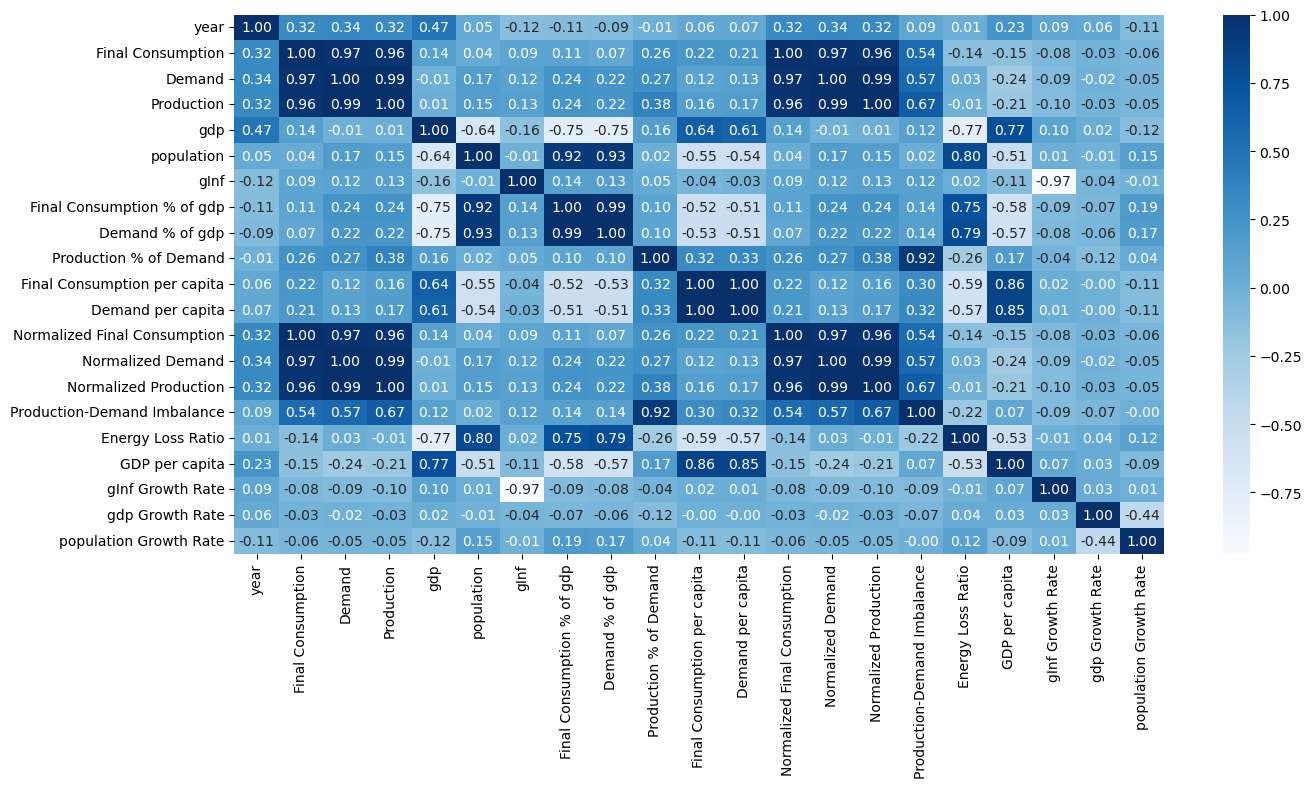

In [59]:
# Draw coorelation graph
# Data Correlation
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Blues')


In [60]:
df.to_csv(os.path.join(data_path, 'final_data/data.csv'), index=False)
